In [4]:
!pip install seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

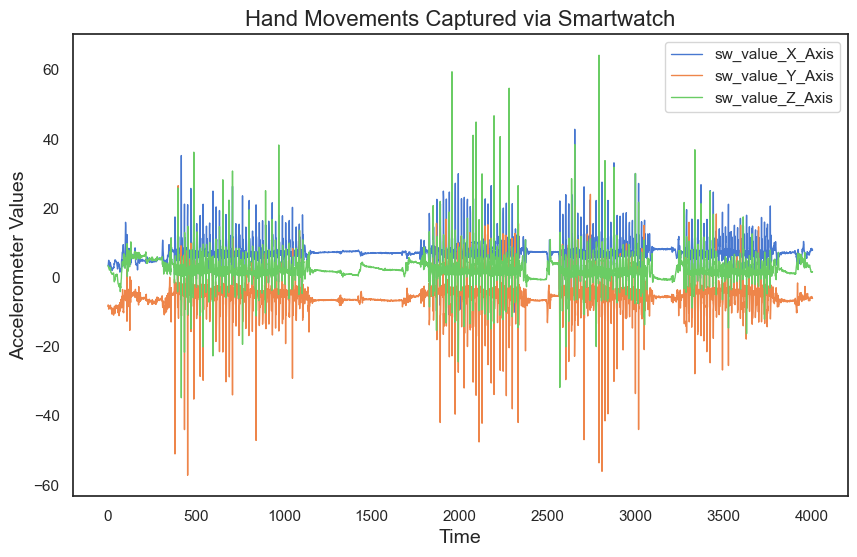

In [ ]:
# Load the CSV file
file_path = '/standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms1/cardiac_arrest/2/smartwatch_data/sync_smartwatch.csv'  # Update this with your file path
smartwatch_data = pd.read_csv(file_path)

# Set the Seaborn style
# Set the Seaborn style and color palette
sns.set(style="white", palette="muted")

# Create the plot with Seaborn and enhance the aesthetics
plt.figure(figsize=(10, 6))
sns.lineplot(data=smartwatch_data[['sw_value_X_Axis', 'sw_value_Y_Axis', 'sw_value_Z_Axis']], 
             dashes=False, linewidth=1)

# Add labels and title
plt.xlabel('Frame', fontsize=14)
plt.ylabel('Accelerometer Values', fontsize=14)
plt.title('Hand Movements Captured via Smartwatch', fontsize=16)

# Remove axes, labels, and titles
# plt.legend([], [], frameon=False)
# plt.axis('off')

# Save the plot with a transparent background
plt.savefig('./figures/smartwatch_plot_seaborn.png', transparent=True, bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()

In [ ]:
!module load ffmpeg
!ffmpeg 

ffmpeg version 5.1.6 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 8 (GCC)
  configuration: --arch=x86_64 --bindir=/usr/bin --datadir=/usr/share/ffmpeg --disable-static --disable-stripping --enable-amf --enable-avcodec --enable-avdevice --enable-avfilter --enable-avformat --enable-alsa --enable-bzlib --enable-chromaprint --enable-decklink --enable-frei0r --enable-gcrypt --enable-gmp --enable-gpl --enable-gray --enable-iconv --enable-ladspa --enable-libass --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdc1394 --enable-libdav1d --enable-libdavs2 --enable-libdrm --enable-libfdk-aac --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libiec61883 --enable-libilbc --enable-libjack --enable-libjxl --enable-libklvanc --enable-libkvazaar --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libndi_newtek --enable-libopencor

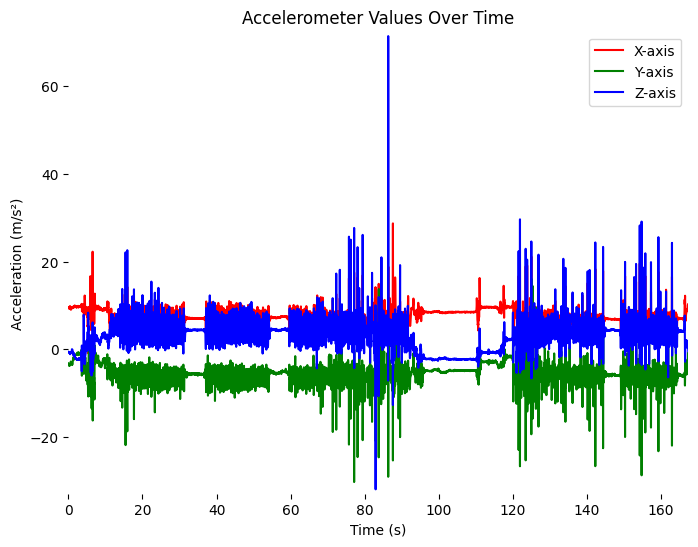

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np


sw_data_path = "/standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng2/cardiac_arrest/0/smartwatch_data/sync_smartwatch.csv"
# Load your data
data = pd.read_csv(sw_data_path)  # Make sure to adjust the path if needed
x_values = data['sw_value_X_Axis']
y_values = data['sw_value_Y_Axis']
z_values = data['sw_value_Z_Axis']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, len(x_values) / 30)  # Time in seconds on the x-axis
ax.set_ylim(min(x_values.min(), y_values.min(), z_values.min()) - 1,
            max(x_values.max(), y_values.max(), z_values.max()) + 1)
ax.set_title('Accelerometer Values Over Time')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acceleration (m/s²)')

# Initialize lines for each axis
line_x, = ax.plot([], [], label='X-axis', color='r')
line_y, = ax.plot([], [], label='Y-axis', color='g')
line_z, = ax.plot([], [], label='Z-axis', color='b')

# remove lines 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.legend()

# Initialize animation
def init():
    line_x.set_data([], [])
    line_y.set_data([], [])
    line_z.set_data([], [])
    return line_x, line_y, line_z

# Update function for each frame
def animate(i):
    # Time sequence based on 30Hz frame rate
    t = np.linspace(0, i / 30, i + 1)
    line_x.set_data(t, x_values[:i + 1])
    line_y.set_data(t, y_values[:i + 1])
    line_z.set_data(t, z_values[:i + 1])
    return line_x, line_y, line_z

# Create and save animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(x_values), interval=1000/30, blit=True)
ani.save('./output/visualized_video/ng2_t0_smartwatch.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
